In [1]:
import numpy as np
import scipy as sp
import math as m
import prettytable as pt
from Library_asgn4 import *
import Library_asgn4 as lib

## Q1

In [2]:
rng_1 = rng(seed=11,a=65,m=1021,c=0)
rng_2 = rng(seed=11,a=572,m=16381,c=0)

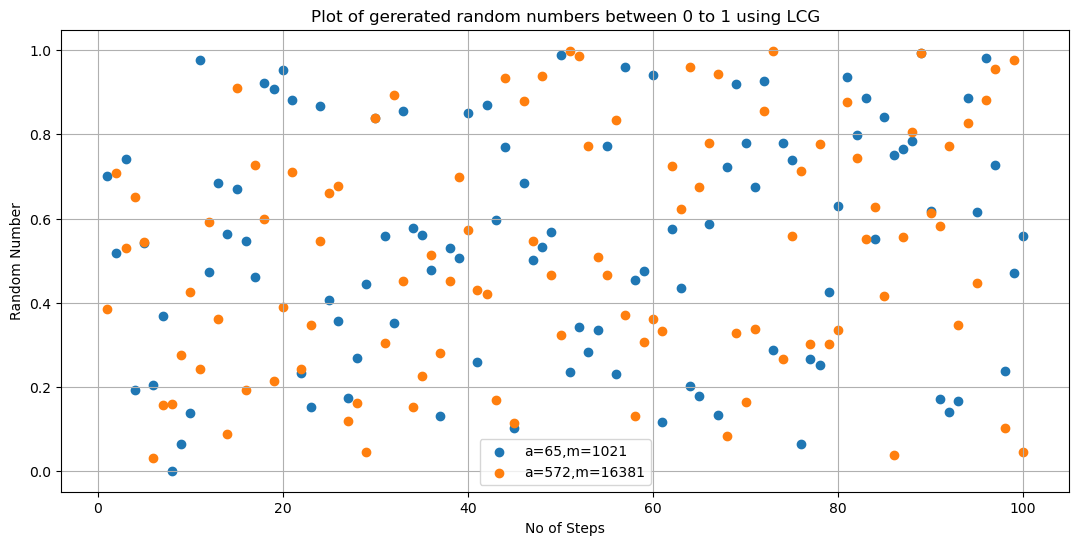

In [3]:
xlist = [i for i in range(1,101)]
ylist_1 = [rng_1.gen() for i in range(1,101)]
ylist_2 = [rng_2.gen() for i in range(1,101)]

import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.scatter(xlist,ylist_1,label='a=65,m=1021')
plt.scatter(xlist,ylist_2,label='a=572,m=16381')
plt.xlabel('No of Steps')
plt.ylabel('Random Number')
plt.title('Plot of gererated random numbers between 0 to 1 using LCG')
plt.legend()
plt.grid()
plt.show()

## Q2

In [4]:
def f(x):
    return np.cos(x)


x_min = -np.pi/2
x_max = np.pi/2

I = monte_carlo_integrate(f,x_min,x_max,10000,17,multiplier=572,m=16381,c=0)
print("The value of integral is ",I, "using 10000 points")  

The value of integral is  2.0065394710490914 using 10000 points


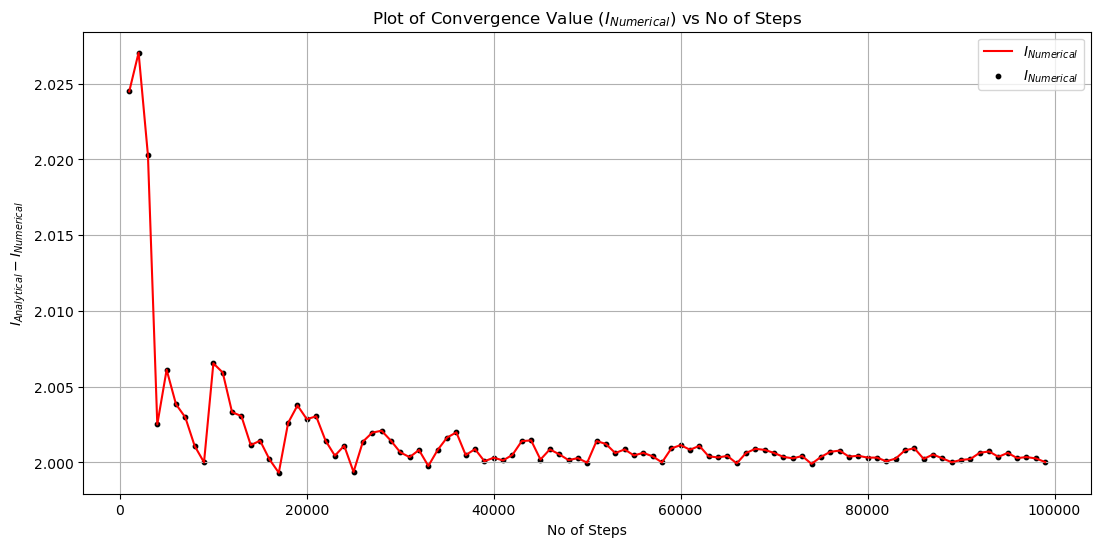

In [5]:
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
for i in range(1000,100000,1000):
    xlist.append(i)
    ylist.append(abs(monte_carlo_integrate(f,x_min,x_max,i,17,multiplier=572,m=16381,c=0)))

plt.plot(xlist,ylist,label=r'$I_{Numerical}$',color='red')
plt.scatter(xlist,ylist,label=r'$I_{Numerical}$',color='black',s=10)
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Analytical} - I_{Numerical}$')
plt.title(r'Plot of Convergence Value ($I_{Numerical}$) vs No of Steps')
plt.legend()
plt.grid()
plt.show()

## Q3

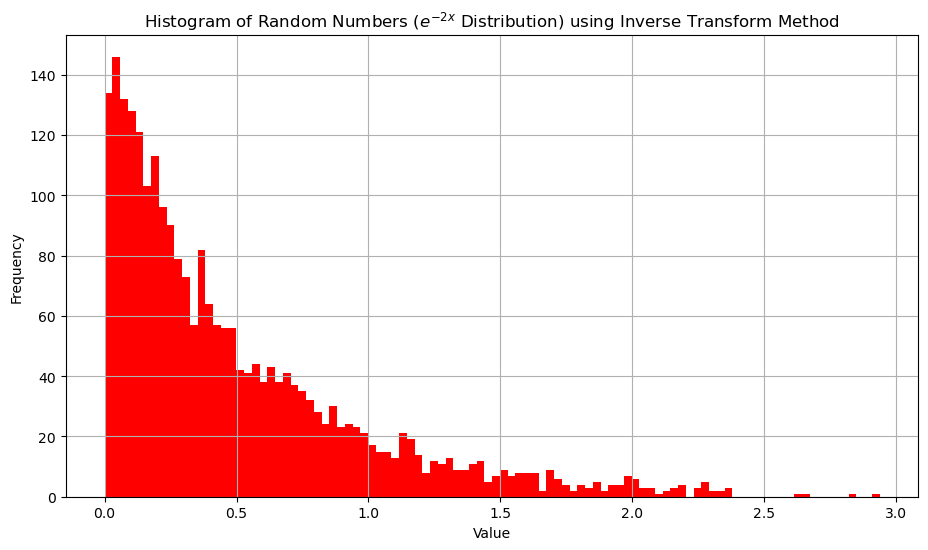

In [6]:
# Defining the distribution function
def f(x):
    return np.exp(-2*x)

# Defining the inverse of the distribution function
def f_inv(x):
    return -0.5*np.log(abs(1-(2*x/3)))


# Initialising the RNG
rng = rng(seed = 17)


# Storing the generated random numbers
rng_list = []
for i in range(2500):
    p= 3*rng.gen()
    if f_inv(p)<3:
        rng_list.append(f_inv(p))


# Plotting the histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of Random Numbers ($e^{-2x}$ Distribution) using Inverse Transform Method')
plt.grid()
plt.show()

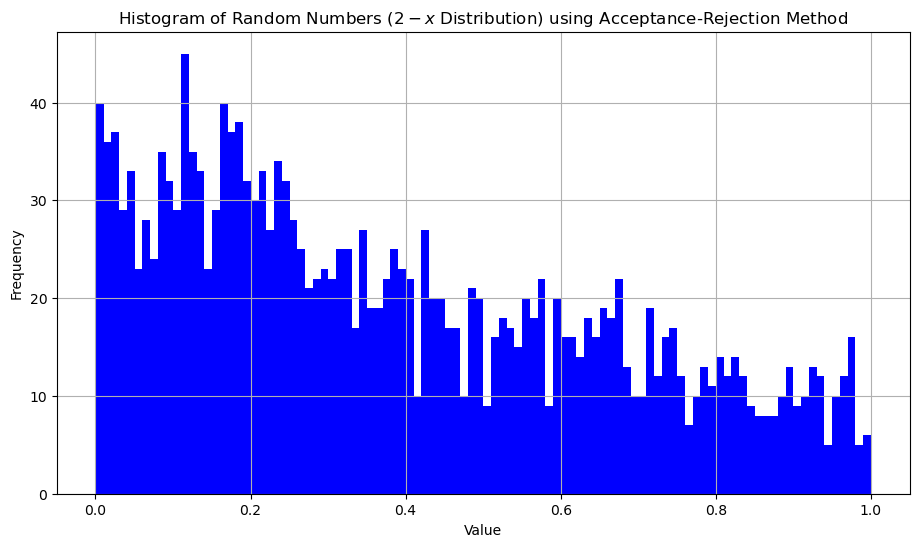

In [7]:
rng_1 = lib.rng(seed=19) # for x
rng_2 = lib.rng(seed=13) # for u

rng_list = []

def f(x):
    return np.exp(-2*x)

def g(x):
    return 2-x


while True:
    x= rng_1.gen()
    u= rng_2.gen()
    test = f(x)/((0.5)*g(x))
    if u<=test:
        rng_list.append(x)
    if len(rng_list)==2000:
        break
    
        
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='b')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of Random Numbers ($2-x$ Distribution) using Acceptance-Rejection Method')
plt.grid()
plt.show()

## Q4

In [8]:
# Define the function to integrate
def f(x):
    return np.exp(-2 * x) / (1 + x**2)

# Define the importance sampling functions and their inverse CDFs
def p1(x):
    return 0.5

def inverse_cdf_p1(y):
    return 2 * y

def p2(x):
    return np.exp(-x)

def inverse_cdf_p2(y):
    return -np.log(1 - y)

def p3(x):
    return np.exp(-x / 2) / (2 * (1 - np.exp(-1)))

def inverse_cdf_p3(y):
    return -2 * np.log(1 - y * (1 - np.exp(-1)))
"""
# Monte Carlo integration with importance sampling
def monte_carlo_importance_sampling(f, p, inverse_cdf_p, n):
    samples = inverse_cdf_p(np.random.uniform(0, 1, n))
    weights = f(samples) / p(samples)
    return np.mean(weights), np.var(weights)
"""
# Calculate the approximations and variances
n = 10000
approximation_p1, variance_p1 = lib.monte_carlo_importance_sampling(f, p1, inverse_cdf_p1, n)
approximation_p2, variance_p2 = lib.monte_carlo_importance_sampling(f, p2, inverse_cdf_p2, n)
approximation_p3, variance_p3 = lib.monte_carlo_importance_sampling(f, p3, inverse_cdf_p3, n)

#print the function to be integrated
print('\n The integral of exp(-2x)/(1+x^2) from 0 to infinity is approximately 0.39767. \n')

# Print the results
print(f"Approximation with p1: {approximation_p1}, Variance: {variance_p1}")
print(f"Approximation with p2: {approximation_p2}, Variance: {variance_p2}")
print(f"Approximation with p3: {approximation_p3}, Variance: {variance_p3}")

print('\n The importance sampling method with p3 is the most efficient. \n')


 The integral of exp(-2x)/(1+x^2) from 0 to infinity is approximately 0.39767. 

Approximation with p1: 0.4090679479221345, Variance: 0.2773050648065791
Approximation with p2: 0.3982095747746351, Variance: 0.1041067477625939
Approximation with p3: 0.4027151809280942, Variance: 0.14389291034441534

 The importance sampling method with p3 is the most efficient. 



Monte Carlo integration leverages random sampling to approximate the value of an integral. The accuracy of this approximation is directly proportional to the number of samples used: more samples yield a more accurate estimate. However, generating a larger number of samples can be computationally demanding.

Variance reduction techniques are designed to enhance the accuracy of the Monte Carlo approximation without the need for additional samples. These techniques modify the sample generation process to decrease the variance, or dispersion, of the estimated integral values.

One such variance reduction method is importance sampling. This technique modifies the probability distribution of the random variables to align more closely with the function being integrated. This adjustment can drastically decrease the variance of the estimate, particularly for functions that exhibit high values within a limited region of the integration domain.

In this context, variance reduction is achieved by judiciously selecting the importance sampling functions p1, p2, and p3. The function that most closely aligns with the shape and range of the integrand will yield the most significant variance reduction.

For instance, if the integrand exhibits high values within a limited region, an importance sampling function that assigns greater weight to that region will decrease the variance of the estimate. On the other hand, if the importance sampling function poorly aligns with the integrand, the variance reduction may be insignificant.